In [1]:
import tensorflow as tf
import pandas
import numpy as np
import os

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight

In [3]:
path = os.getcwd()
path = os.path.join(path, "gtsrb-german-traffic-sign")

In [4]:
batch_size = 64
epochs = 30
INIT_LR = 1e-3
IMG_HEIGHT = 32
IMG_WIDTH = 32
numClasses = 43

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255, 
                                           rotation_range=10, 
                                           zoom_range=0.15,
                                           width_shift_range=0.1,
                                           height_shift_range=0.1,
                                           shear_range=0.15,
                                           horizontal_flip=False,
                                           vertical_flip=False,
                                           fill_mode="nearest")

test_image_generator = ImageDataGenerator(validation_split=0.8, rescale=1./255)

In [6]:
train_csv = os.path.join(path, "Train.csv")
train_df = pandas.read_csv(train_csv, dtype=str, usecols = ["Path","ClassId"])

In [7]:
train_data_gen = train_image_generator.flow_from_dataframe(
        dataframe=train_df,
        directory=path,
        shuffle=True,
        x_col="Path",
        y_col="ClassId",
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical')

Found 39209 validated image filenames belonging to 43 classes.


In [8]:
train_data_gen.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '30': 24,
 '31': 25,
 '32': 26,
 '33': 27,
 '34': 28,
 '35': 29,
 '36': 30,
 '37': 31,
 '38': 32,
 '39': 33,
 '4': 34,
 '40': 35,
 '41': 36,
 '42': 37,
 '5': 38,
 '6': 39,
 '7': 40,
 '8': 41,
 '9': 42}

In [9]:
class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(train_data_gen.classes), 
                train_data_gen.classes)

In [10]:
test_csv = os.path.join(path, "Test.csv")
test_df = pandas.read_csv(test_csv, dtype=str, usecols = ["Path","ClassId"])

In [11]:
val_data_gen = test_image_generator.flow_from_dataframe(
        dataframe=test_df,
        directory=path,
        subset='validation',
        x_col="Path",
        y_col="ClassId",
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical')

test_data_gen = test_image_generator.flow_from_dataframe(
        dataframe=test_df,
        directory=path,
        subset='training',
        x_col="Path",
        y_col="ClassId",
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical')

Found 10104 validated image filenames belonging to 43 classes.
Found 2526 validated image filenames belonging to 43 classes.


In [12]:
model = Sequential([
    Conv2D(8, 5, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    BatchNormalization(axis=-1),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, 3, padding='same', activation='relu'),
    BatchNormalization(axis=-1),
    Conv2D(16, 3, padding='same', activation='relu'),
    BatchNormalization(axis=-1),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, 3, padding='same', activation='relu'),
    BatchNormalization(axis=-1),
    Conv2D(32, 3, padding='same', activation='relu'),
    BatchNormalization(axis=-1),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(numClasses, activation='softmax')
])

In [13]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / (epochs * 0.5))

In [14]:
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    class_weight=class_weights,
    verbose = 1
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 613 steps, validate for 158 steps
Epoch 1/30
613/613 [==============================] - 295s 482ms/step - loss: 2.8042 - accuracy: 0.2547 - val_loss: 1.4912 - val_accuracy: 0.4973
Epoch 2/30
613/613 [==============================] - 276s 451ms/step - loss: 1.5078 - accuracy: 0.5163 - val_loss: 0.9689 - val_accuracy: 0.6751
Epoch 3/30
613/613 [==============================] - 190s 309ms/step - loss: 1.0274 - accuracy: 0.6635 - val_loss: 0.6044 - val_accuracy: 0.7985
Epoch 4/30
613/613 [==============================] - 189s 309ms/step - loss: 0.7277 - accuracy: 0.7605 - val_loss: 0.4547 - val_accuracy: 0.8524
Epoch 5/30
613/613 [==============================] - 195s 319ms/step - loss: 0.5536 - accuracy: 0.8211 - val_loss: 0.3623 - val_accuracy: 0.8926
Epoch 6/30
613/613 [==============================] - 203s 331ms/step - loss: 0.4485 - accuracy: 0.8579 - val_loss: 0.3201 - val_accuracy: 0.8959
Epoch 7/30
613/613 [==========

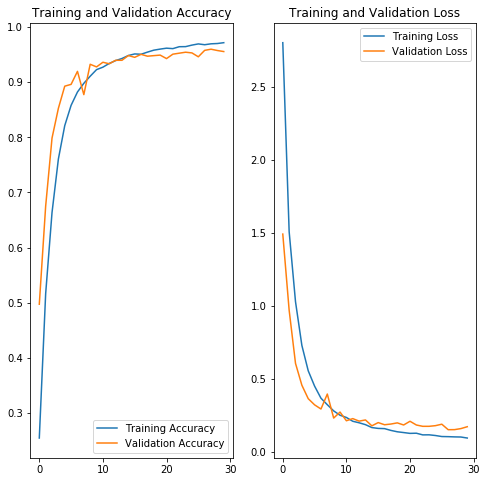

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
test_loss, test_accuracy = model.evaluate(test_data_gen)

  ...
    to  
  ['...']
40/40 [==============================] - 8s 190ms/step - loss: 0.1916 - accuracy: 0.9513


In [19]:
model.save('TrafficSignRecModel.h5')